install the modules we need

In [4]:
!pip install seaborn
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.5 MB 13.1 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.5 MB 13.1 MB/s eta 0:00:01
   ------------------------------ --------- 8.7/11.5 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 15.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

train_path = './train.csv'
test_path = './test.csv'

# Load the data
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

**Printing Dataset Shapes and Basic Information**
---

In [6]:
print("=== Basic Info: Train ===")
display(train.info(verbose=True, memory_usage='deep'))

print("\n=== Basic Info: Test ===")
display(test.info(verbose=True, memory_usage='deep'))

print("\nTrain Shape:", train.shape)
print("Test Shape:", test.shape)

print("\nFirst few rows of Train:")
display(train.head())

print("\nFirst few rows of Test:")
display(test.head())

train_cols = set(train.columns)
test_cols = set(test.columns)
print("\nColumns in Train not in Test:", train_cols - test_cols)
print("Columns in Test not in Train:", test_cols - train_cols)

=== Basic Info: Train ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insuranc

None


=== Basic Info: Test ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    7999

None


Train Shape: (1200000, 21)
Test Shape: (800000, 20)

First few rows of Train:


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0



First few rows of Test:


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House



Columns in Train not in Test: {'Premium Amount'}
Columns in Test not in Train: set()


**show missing values**

In [7]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False)
    return mis_val_table

print("\nMissing Values in Train:")
display(missing_values_table(train))

print("\nMissing Values in Test:")
display(missing_values_table(test))

print("\nNumber of duplicates in Train:", train.duplicated().sum())
print("Number of duplicates in Test:", test.duplicated().sum())

print("\nTrain Summary Statistics (Numeric & Categorical):")
display(train.describe(include='all'))

print("\nTest Summary Statistics (Numeric & Categorical):")
display(test.describe(include='all'))


Missing Values in Train:


,Missing Values,% of Total Values
Previous Claims,364029,30.335750
Occupation,358075,29.839583
Credit Score,137882,11.490167
Number of Dependents,109672,9.139333
Customer Feedback,77824,6.485333
Health Score,74076,6.173000
Annual Income,44949,3.745750
Age,18705,1.558750
Marital Status,18529,1.544083
Vehicle Age,6,0.000500



Missing Values in Test:


,Missing Values,% of Total Values
Previous Claims,242802,30.350250
Occupation,239125,29.890625
Credit Score,91451,11.431375
Number of Dependents,73130,9.141250
Customer Feedback,52276,6.534500
Health Score,49449,6.181125
Annual Income,29860,3.732500
Age,12489,1.561125
Marital Status,12336,1.542000
Vehicle Age,3,0.000375



Number of duplicates in Train: 0
Number of duplicates in Test: 0

Train Summary Statistics (Numeric & Categorical):


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
count,1.200000e+06,1.181295e+06,1200000,1.155051e+06,1181471,1.090328e+06,1200000,841925,1.125924e+06,1200000,...,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1200000,1122176,1200000,1200000,1200000,1.200000e+06
unique,NaN,NaN,2,NaN,3,NaN,4,3,NaN,3,...,NaN,NaN,NaN,NaN,167381,3,2,4,3,NaN
top,NaN,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,...,NaN,NaN,NaN,NaN,2020-02-08 15:21:39.134960,Average,Yes,Weekly,House,NaN
freq,NaN,NaN,602571,NaN,395391,NaN,303818,282750,NaN,401542,...,NaN,NaN,NaN,NaN,142,377905,601873,306179,400349,NaN
mean,5.999995e+05,4.114556e+01,NaN,3.274522e+04,NaN,2.009934e+00,NaN,NaN,2.561391e+01,NaN,...,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,NaN,NaN,NaN,NaN,NaN,1.102545e+03
std,3.464103e+05,1.353995e+01,NaN,3.217951e+04,NaN,1.417338e+00,NaN,NaN,1.220346e+01,NaN,...,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,NaN,NaN,NaN,NaN,NaN,8.649989e+02
min,0.000000e+00,1.800000e+01,NaN,1.000000e+00,NaN,0.000000e+00,NaN,NaN,2.012237e+00,NaN,...,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,NaN,NaN,NaN,NaN,NaN,2.000000e+01
25%,2.999998e+05,3.000000e+01,NaN,8.001000e+03,NaN,1.000000e+00,NaN,NaN,1.591896e+01,NaN,...,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,NaN,NaN,NaN,NaN,NaN,5.140000e+02
50%,5.999995e+05,4.100000e+01,NaN,2.391100e+04,NaN,2.000000e+00,NaN,NaN,2.457865e+01,NaN,...,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,NaN,NaN,NaN,NaN,NaN,8.720000e+02
75%,8.999992e+05,5.300000e+01,NaN,4.463400e+04,NaN,3.000000e+00,NaN,NaN,3.452721e+01,NaN,...,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,NaN,NaN,NaN,NaN,NaN,1.509000e+03



Test Summary Statistics (Numeric & Categorical):


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,8.000000e+05,787511.000000,800000,770140.000000,787664,726870.000000,800000,560875,750551.000000,800000,800000,557198.000000,799997.000000,708549.000000,799998.000000,800000,747724,800000,800000,800000
unique,NaN,NaN,2,NaN,3,NaN,4,3,NaN,3,3,NaN,NaN,NaN,NaN,158776,3,2,4,3
top,NaN,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,Premium,NaN,NaN,NaN,NaN,2022-08-30 15:21:39.134960,Average,Yes,Weekly,House
freq,NaN,NaN,401089,NaN,263705,NaN,202552,188574,NaN,267190,267629,NaN,NaN,NaN,NaN,98,251217,401859,204514,267151
mean,1.600000e+06,41.136440,NaN,32803.871471,NaN,2.009337,NaN,NaN,25.613036,NaN,NaN,1.004873,9.571891,592.904749,5.018949,NaN,NaN,NaN,NaN,NaN
std,2.309403e+05,13.537829,NaN,32201.063749,NaN,1.415241,NaN,NaN,12.206882,NaN,NaN,0.982803,5.772200,150.116374,2.593759,NaN,NaN,NaN,NaN,NaN
min,1.200000e+06,18.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1.646561,NaN,NaN,0.000000,0.000000,300.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,1.400000e+06,30.000000,NaN,8048.000000,NaN,1.000000,NaN,NaN,15.917353,NaN,NaN,0.000000,5.000000,468.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,1.600000e+06,41.000000,NaN,23981.000000,NaN,2.000000,NaN,NaN,24.580164,NaN,NaN,1.000000,10.000000,595.000000,5.000000,NaN,NaN,NaN,NaN,NaN
75%,1.799999e+06,53.000000,NaN,44660.000000,NaN,3.000000,NaN,NaN,34.517766,NaN,NaN,2.000000,15.000000,721.000000,7.000000,NaN,NaN,NaN,NaN,NaN


**info about target**

<Axes: title={'center': 'Visualizing Missing Values'}>

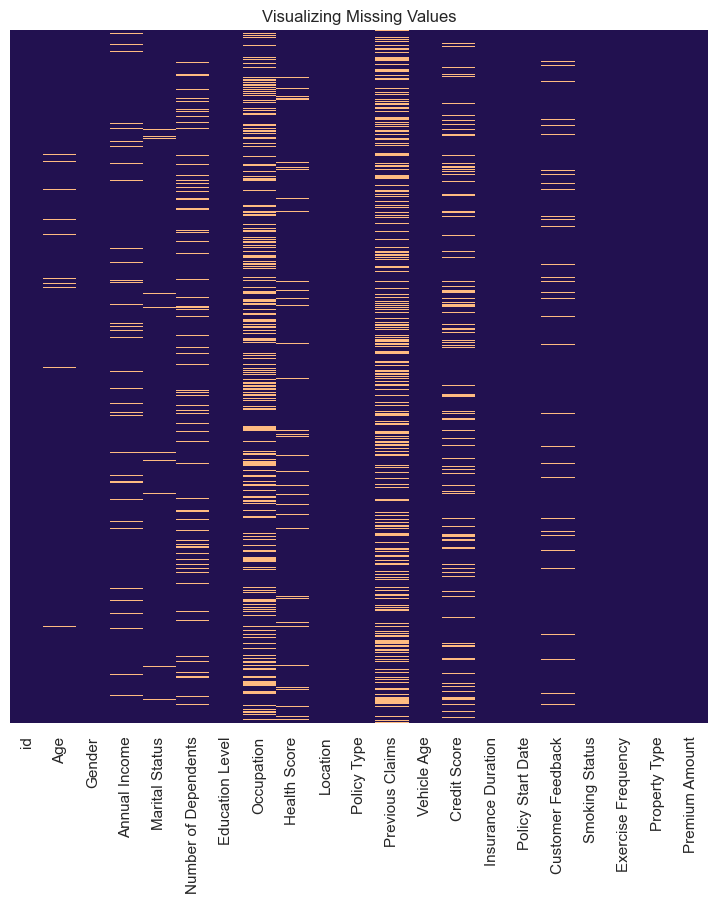

In [3]:
#how the missing values are distributed in our train dataset
plt.figure(figsize=(9,9))
plt.title("Visualizing Missing Values")
sns.heatmap(train.isnull(), cbar=False, cmap=sns.color_palette('magma'), yticklabels=False)

Text(0.5, 1.0, 'Premium Amount: KDE Plot with Highlighted Peaks')

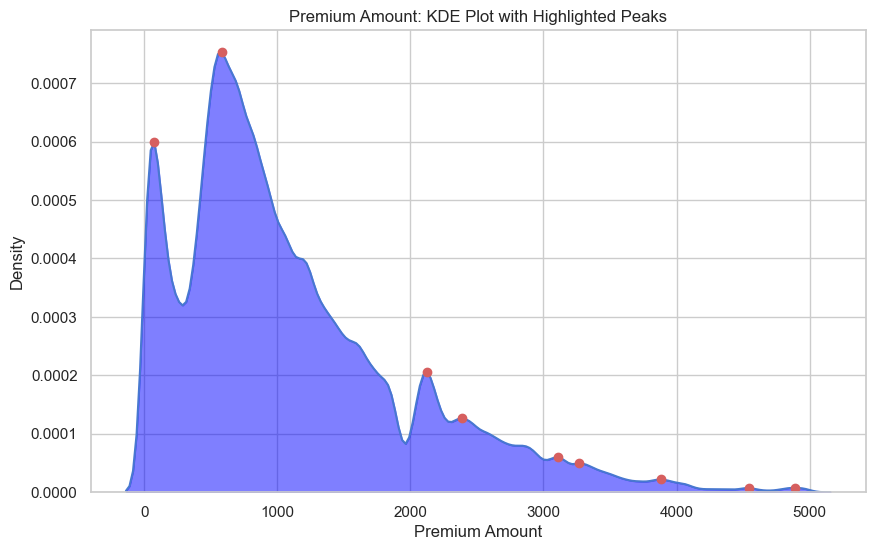

In [4]:
def find_peaks(data, prominence=0, distance=1):
    peaks = []
    length = len(data)

    for i in range(1, length - 1):
        # Check if data point is a peak
        if data[i] > data[i - 1] and data[i] > data[i + 1]:
            # Check for prominence
            if data[i] >= prominence:
                # Ensure minimum distance between peaks
                if not peaks or (i - peaks[-1]) >= distance:
                    peaks.append(i)

    return peaks

kde = sns.kdeplot(data=train, x='Premium Amount').get_lines()[0].get_data()
x = kde[0]
y = kde[1]

peaks = find_peaks(y)
#plot something like a histrogram but meakes it a continuous function to make the peaks evident
plt.plot(x[peaks], y[peaks], 'ro')
plt.fill_between(x, y, color='blue', alpha=0.5)
plt.title('Premium Amount: KDE Plot with Highlighted Peaks')


C:\Users\User\AppData\Local\Temp\ipykernel_9300\2598076609.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train['Premium Amount'].groupby(bins).count().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')


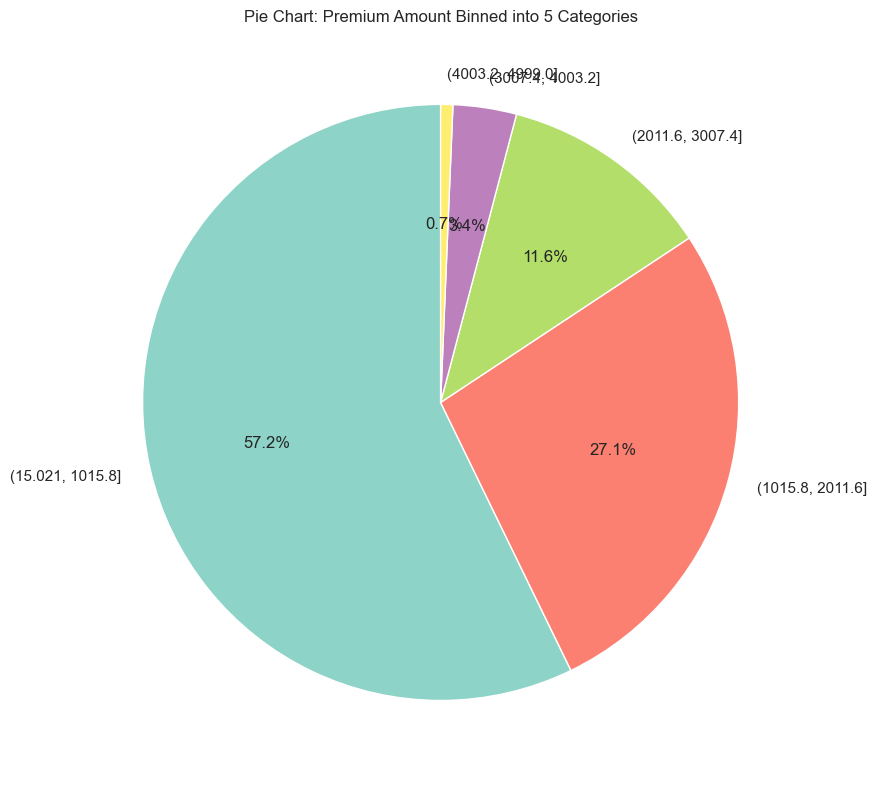

In [5]:
bins = pd.cut(train['Premium Amount'], bins=5)

# Plot pie chart for each bin
plt.figure(figsize=(9, 12))
train['Premium Amount'].groupby(bins).count().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')

# Adding title
plt.title('Pie Chart: Premium Amount Binned into 5 Categories')
plt.ylabel('')
plt.tight_layout()
plt.show()

**see if we have any diffrences between train and test**

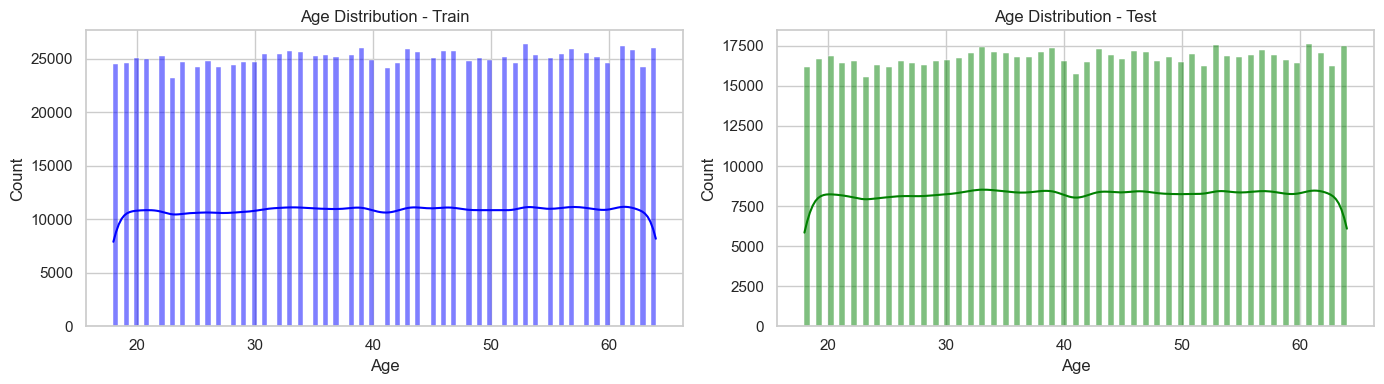

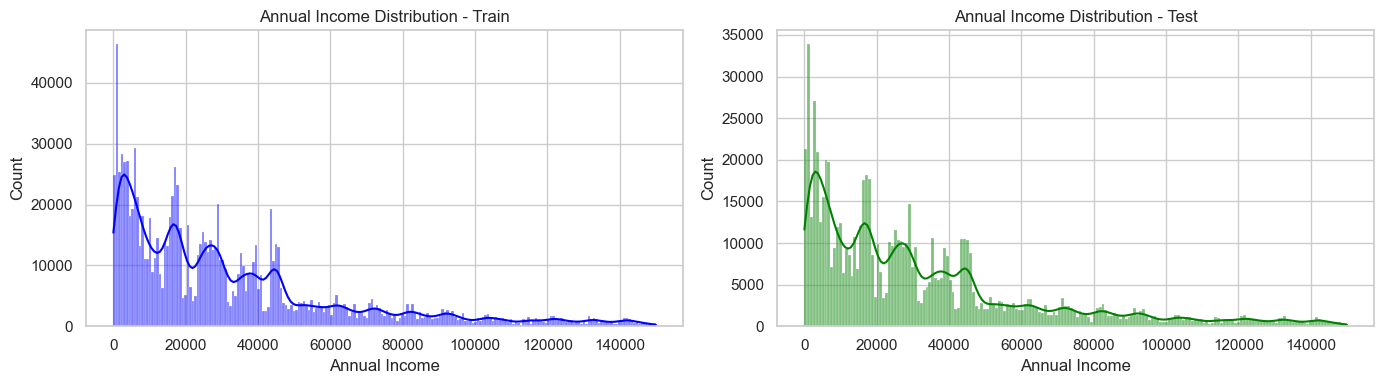

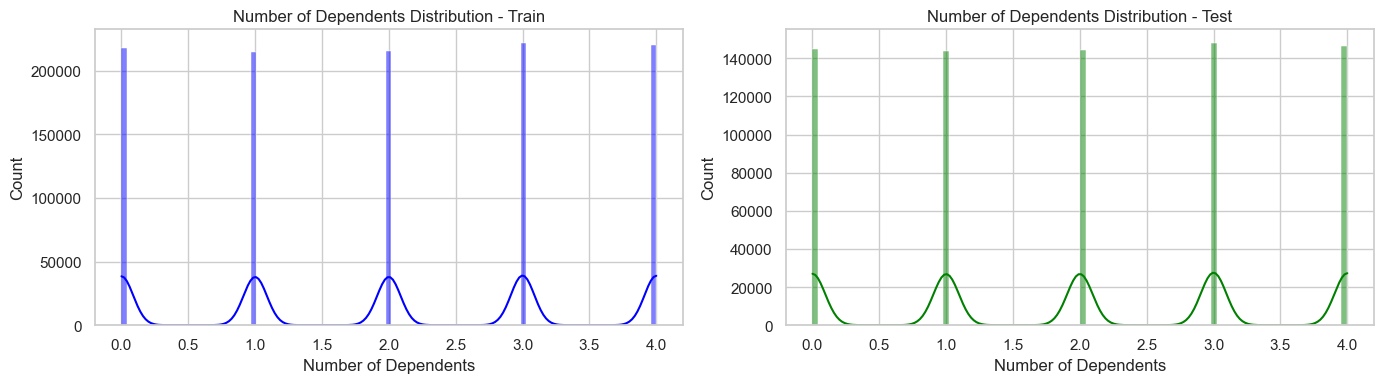

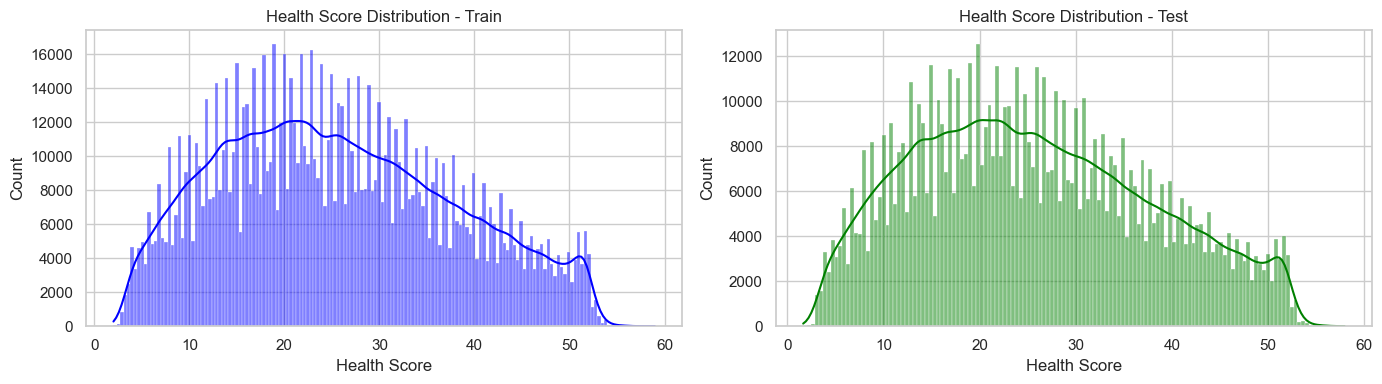

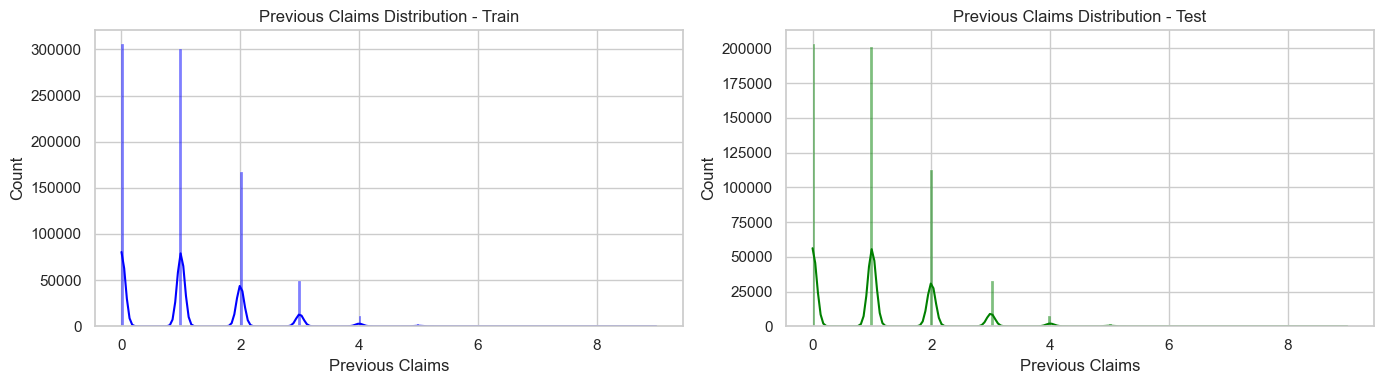

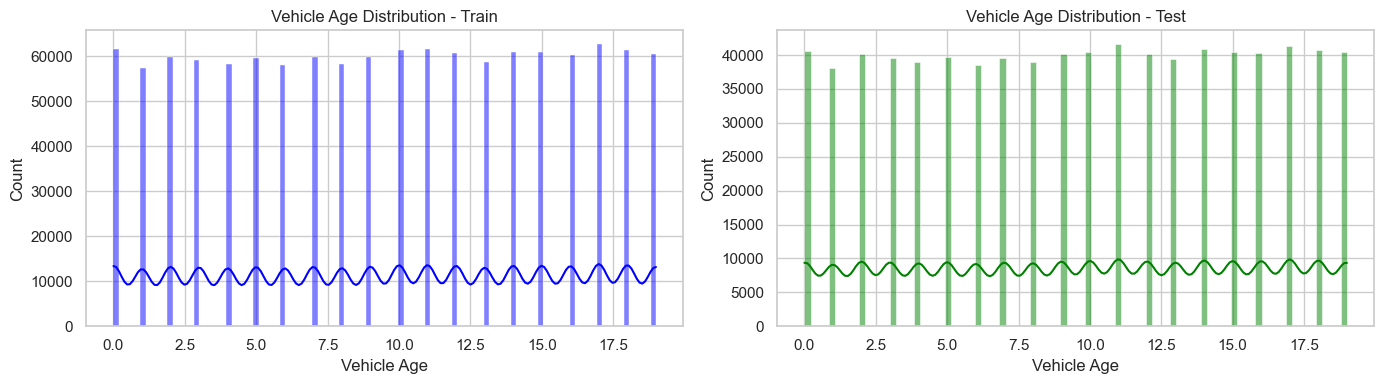

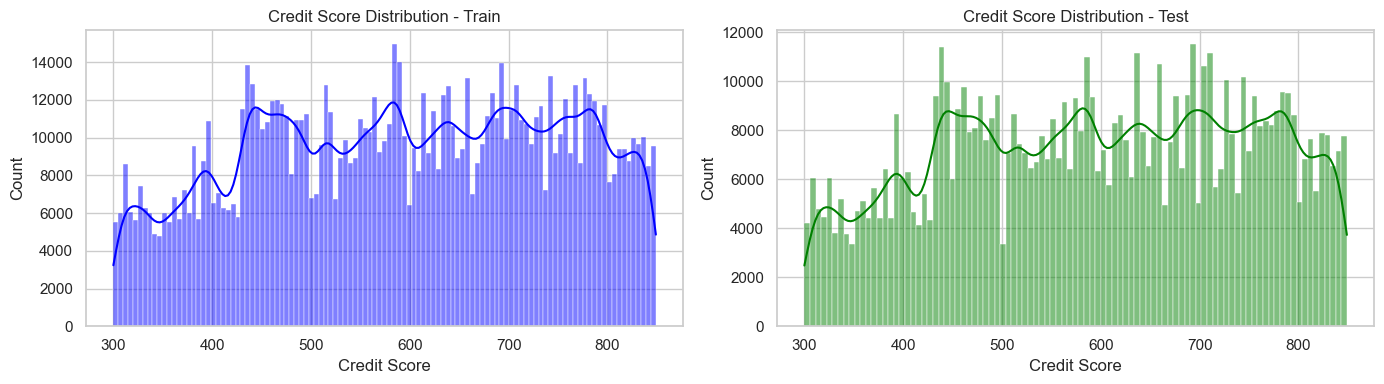

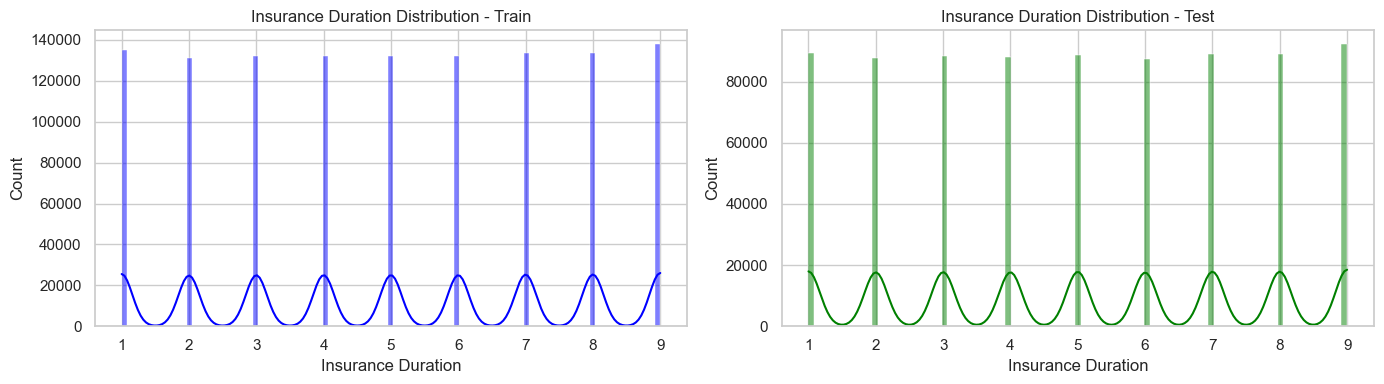

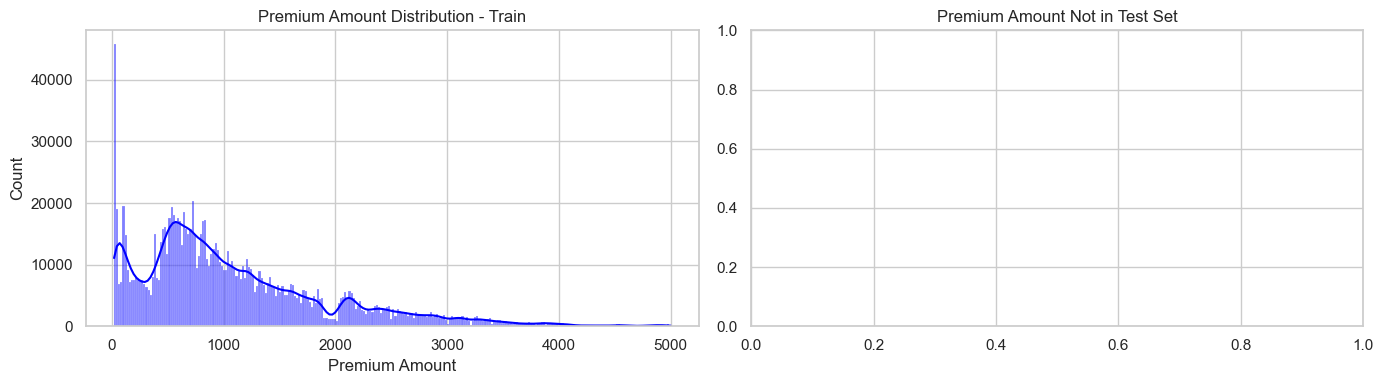

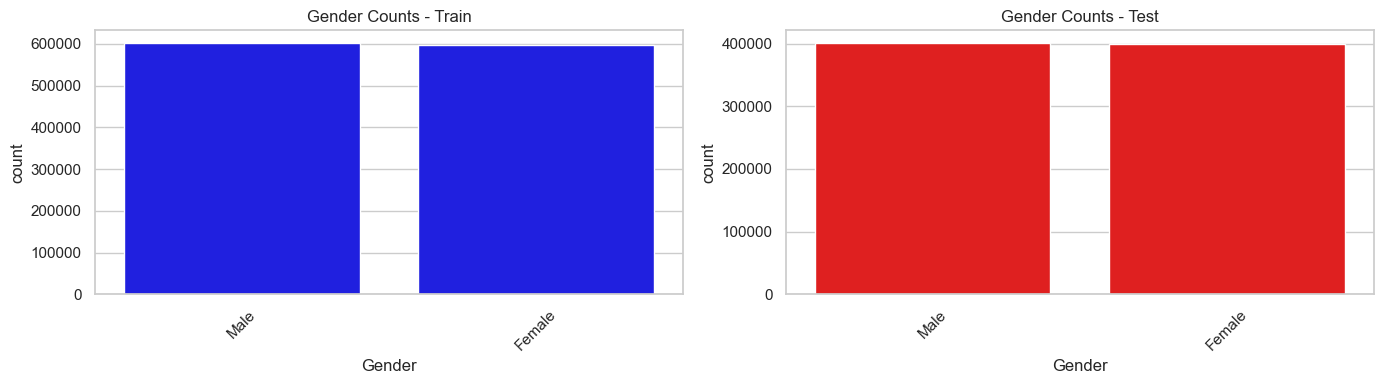

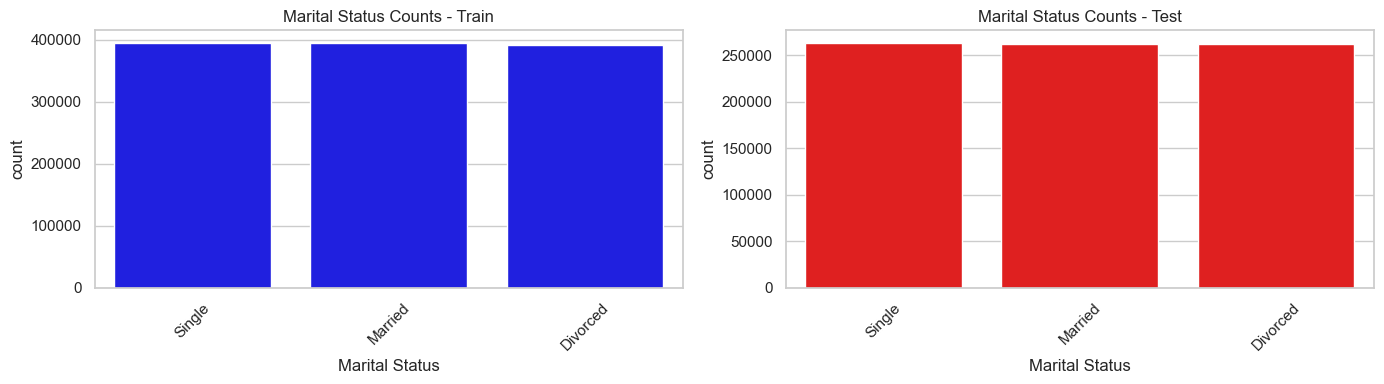

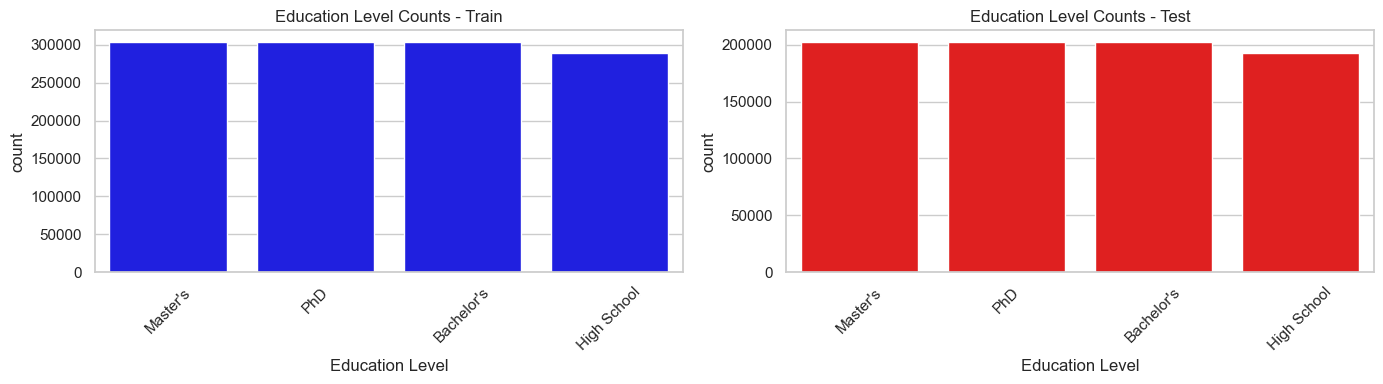

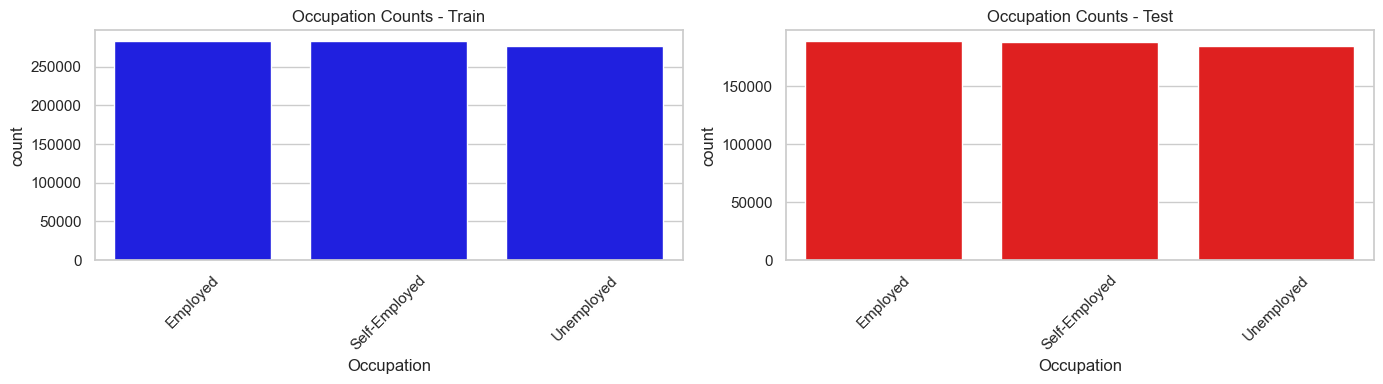

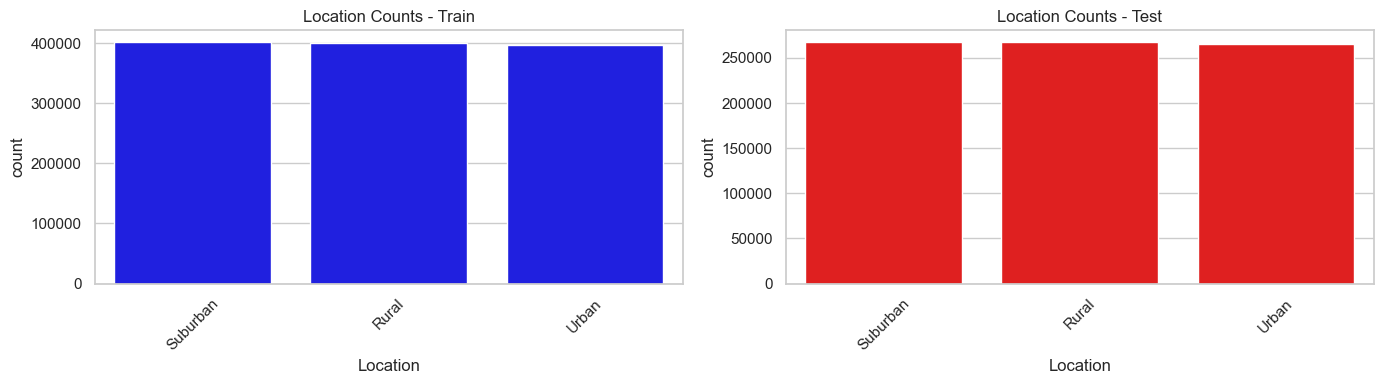

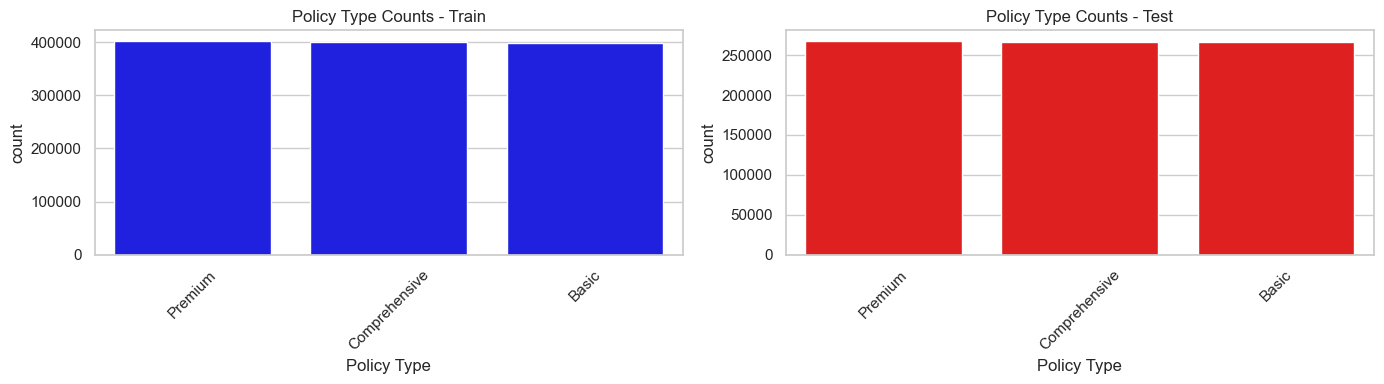

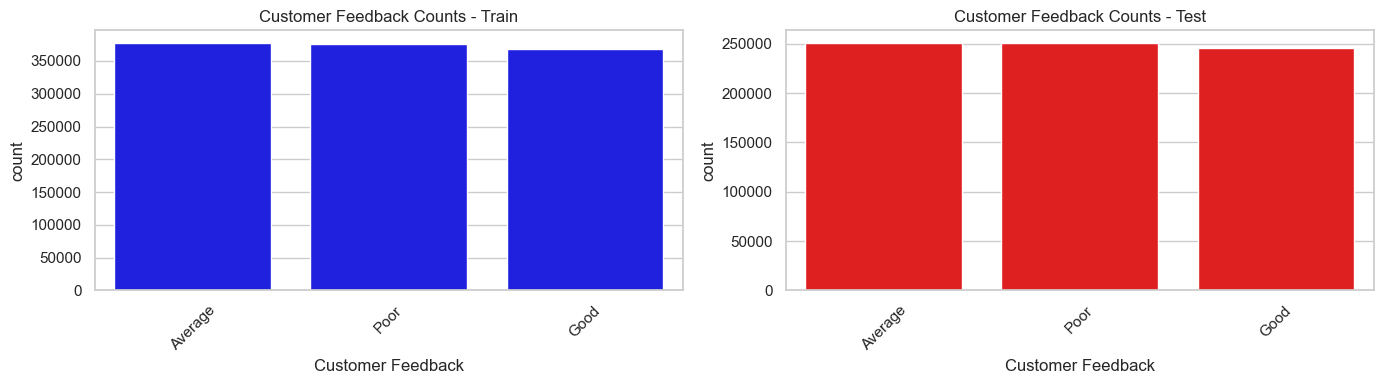

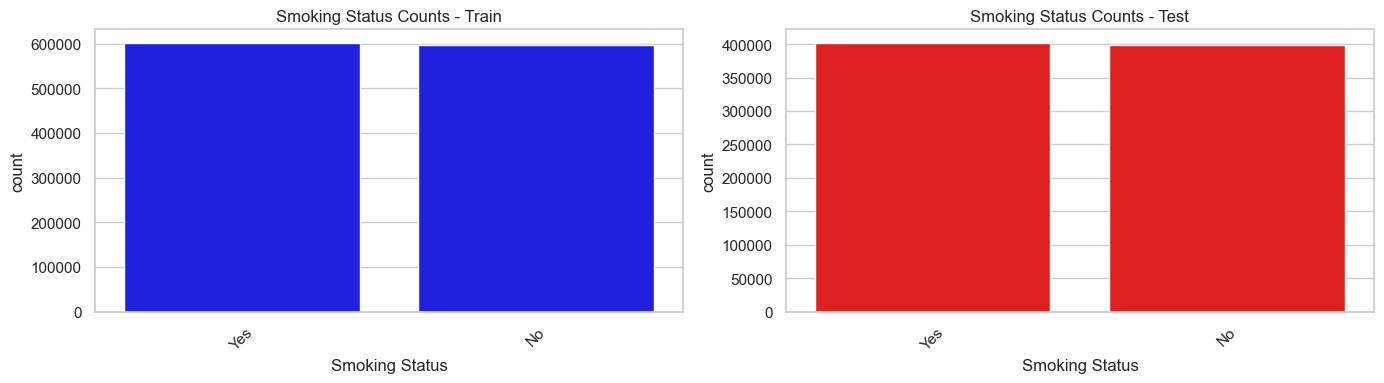

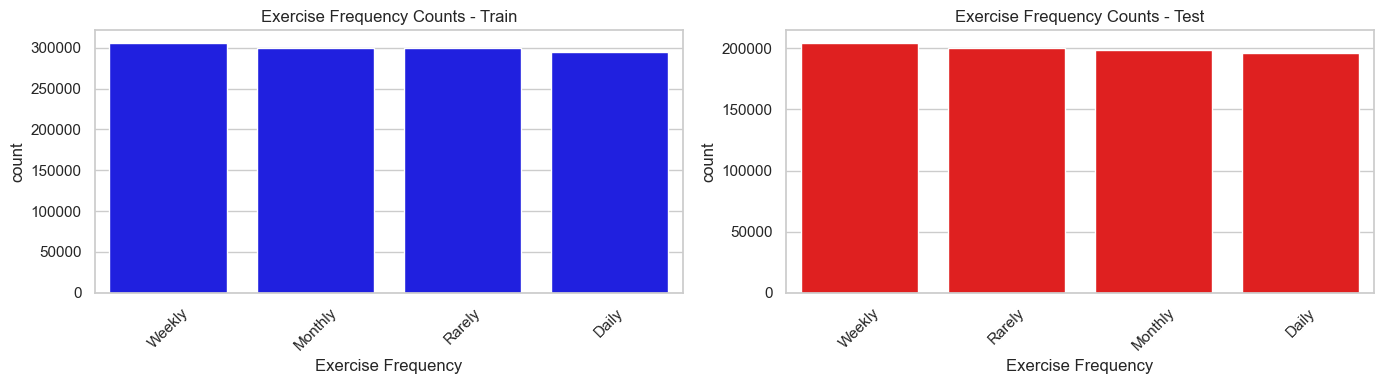

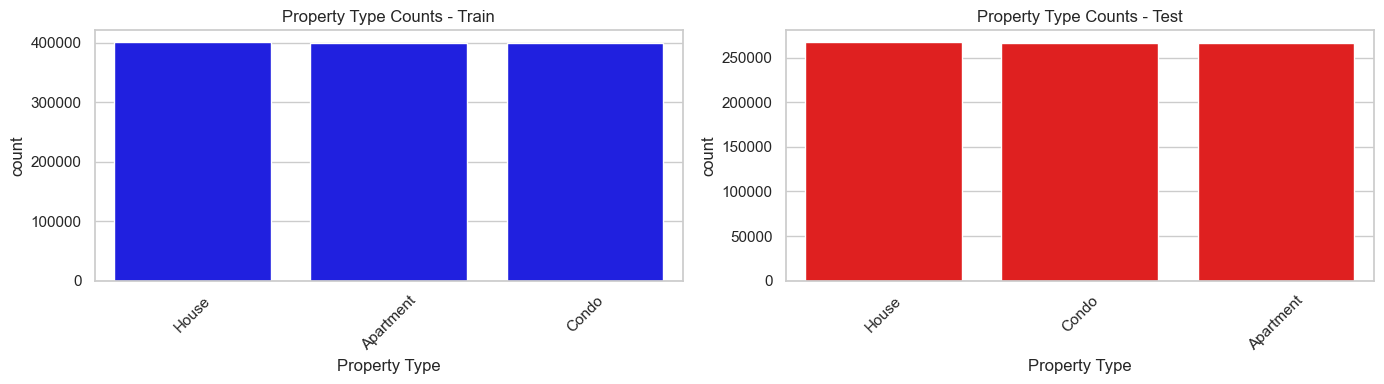

In [8]:
import warnings
warnings.filterwarnings('ignore')

numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('id')

cat_cols = train.select_dtypes(exclude=np.number).columns.tolist()
cat_cols.remove('Policy Start Date')#delete the columns we do not care about
#show histograms and density lines to compare the train set and test set
# Numeric features distributions: Train vs. Test
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    sns.histplot(train[col], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'{col} Distribution - Train')
    
    if col in test.columns:
        sns.histplot(test[col], kde=True, ax=axes[1], color='green')
        axes[1].set_title(f'{col} Distribution - Test')
    else:
        axes[1].set_title(f'{col} Not in Test Set')
    plt.tight_layout()
    plt.show()

# Categorical features distributions: Train vs. Test
for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    sns.countplot(x=col, data=train, ax=axes[0], color='blue', order=train[col].value_counts().index)
    axes[0].set_title(f'{col} Counts - Train')
    axes[0].tick_params(axis='x', rotation=45)
    
    if col in test.columns:
        sns.countplot(x=col, data=test, ax=axes[1], color='red', order=test[col].value_counts().index)
        axes[1].set_title(f'{col} Counts - Test')
        axes[1].tick_params(axis='x', rotation=45)
    else:
        axes[1].set_title(f'{col} Not in Test Set')
    plt.tight_layout()
    plt.show()


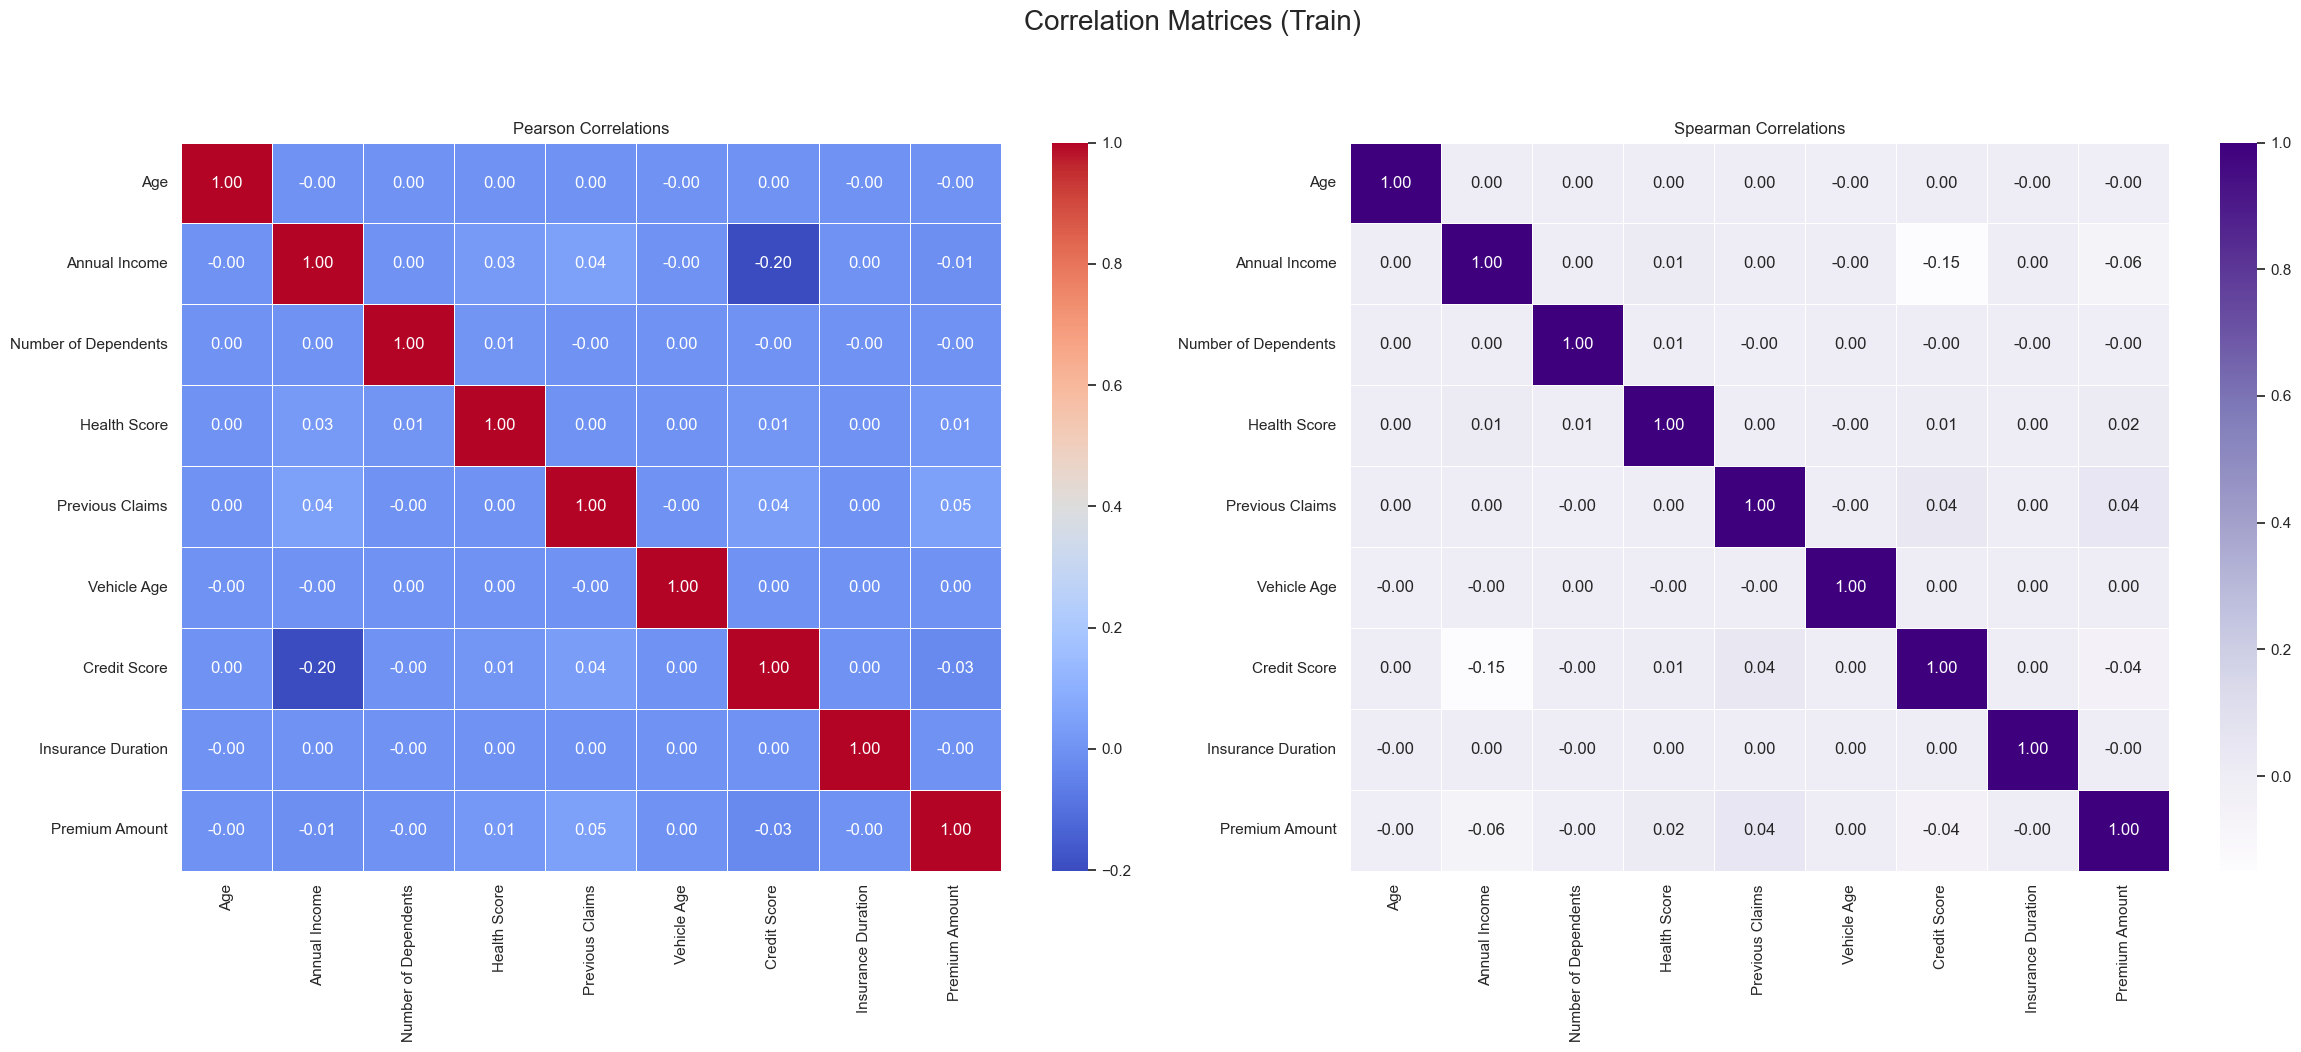

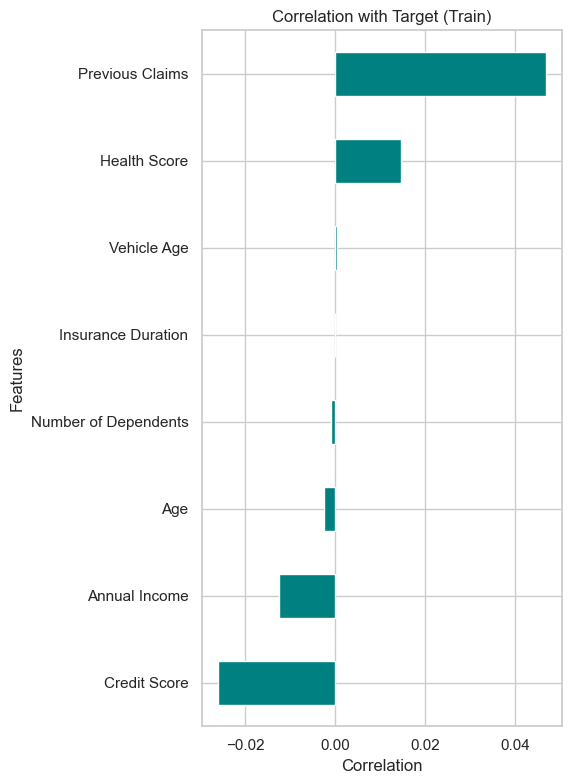

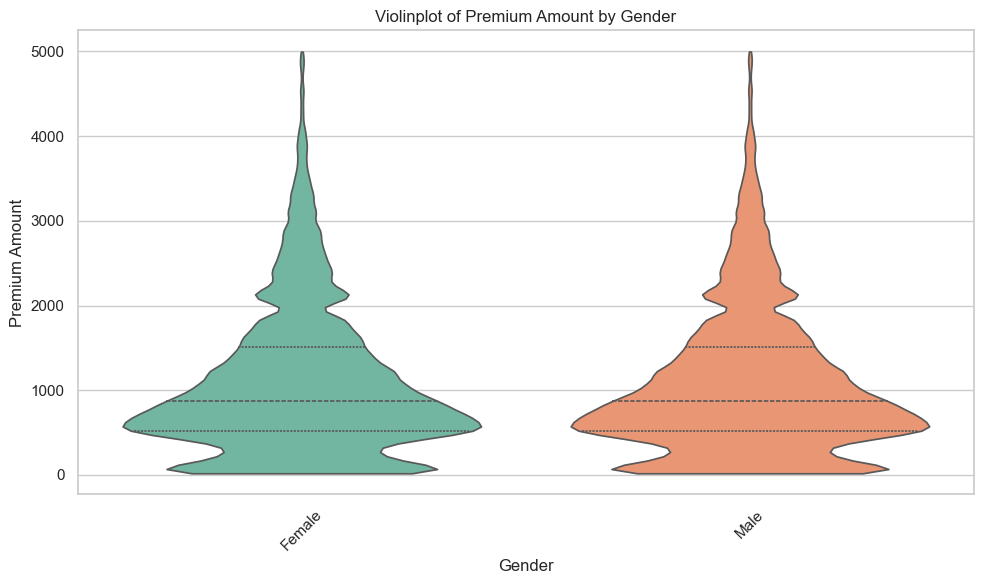

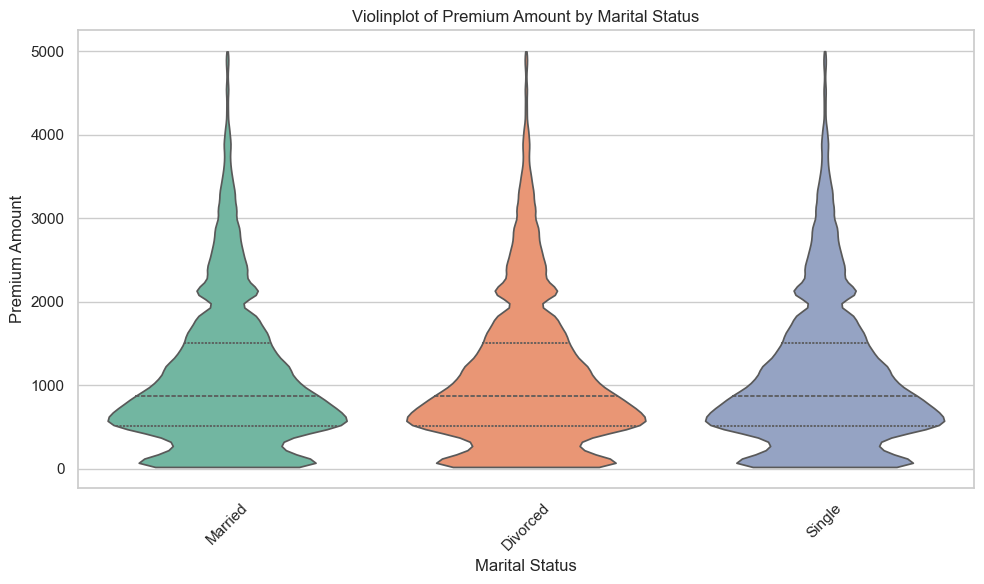

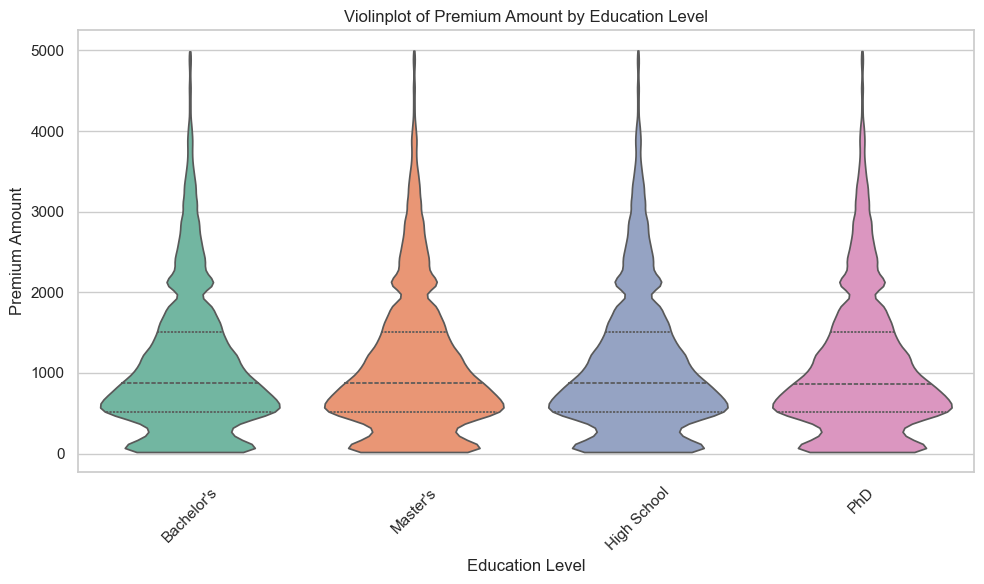

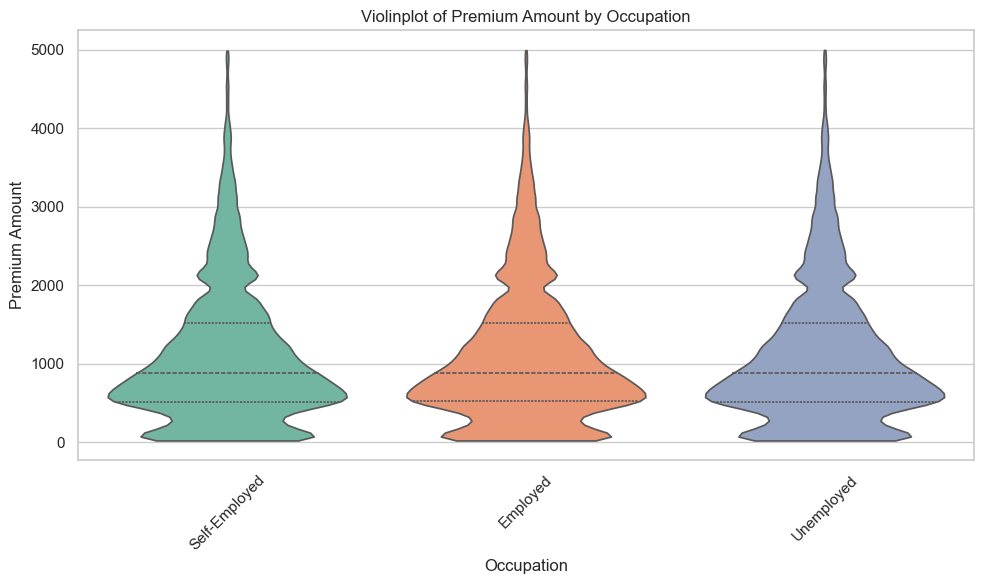

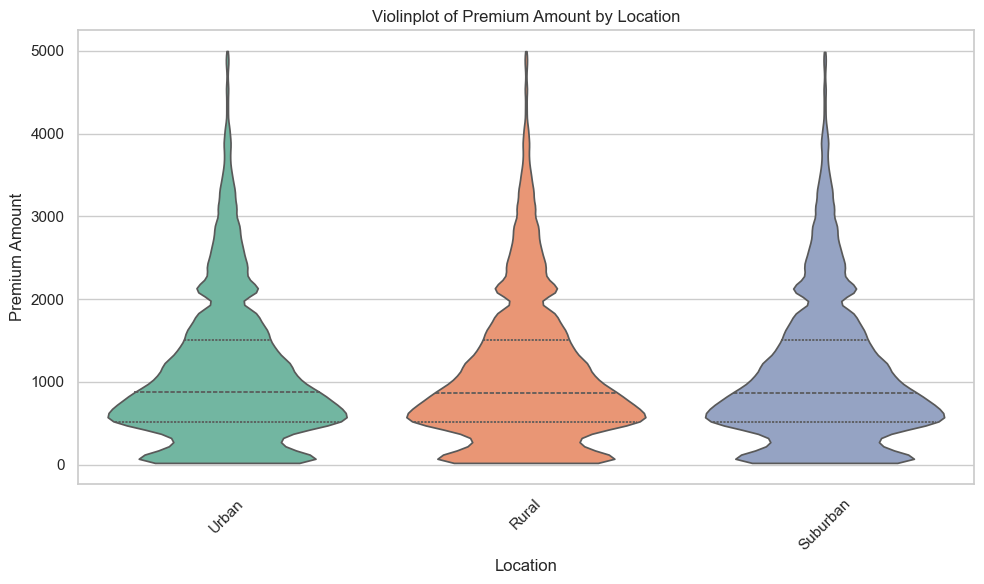

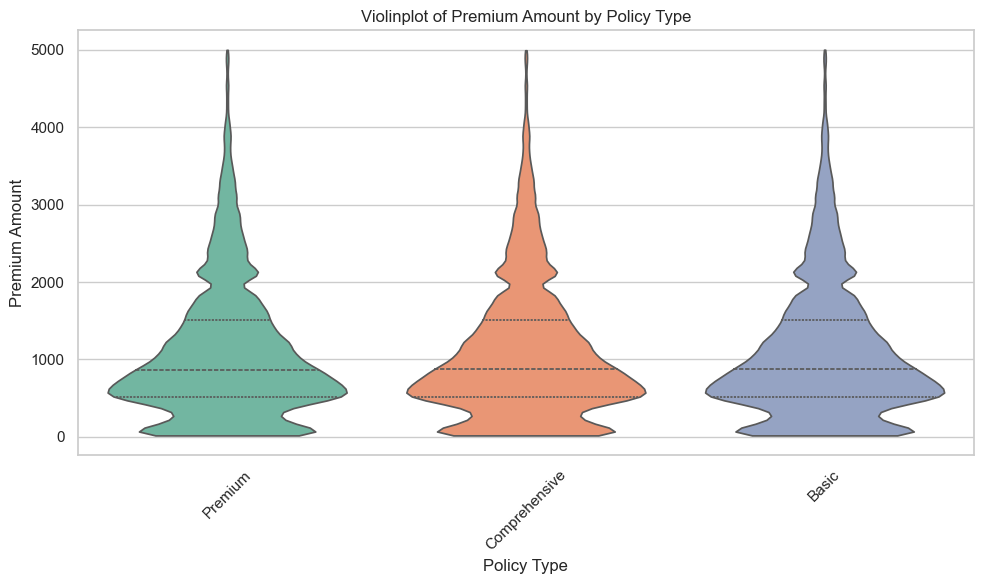

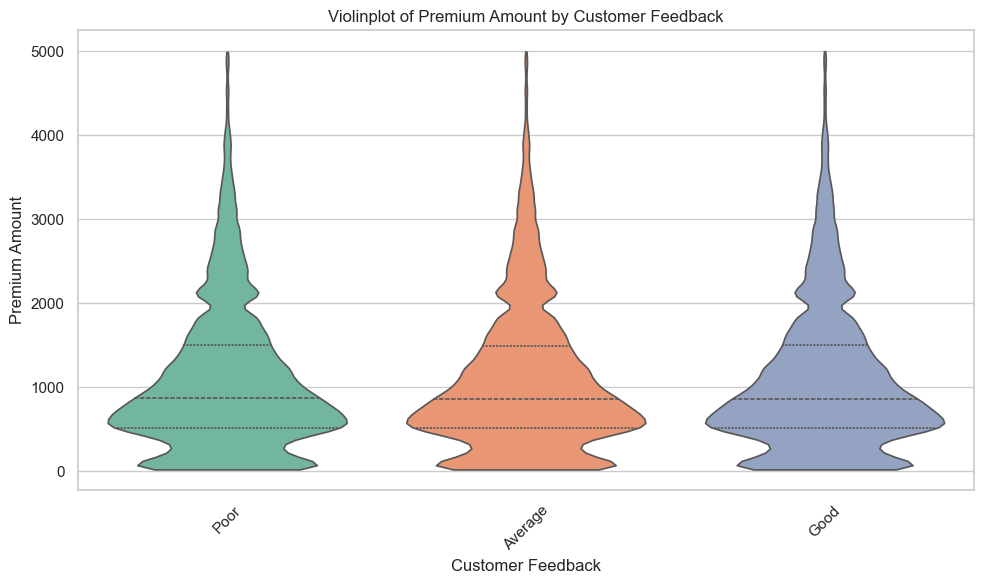

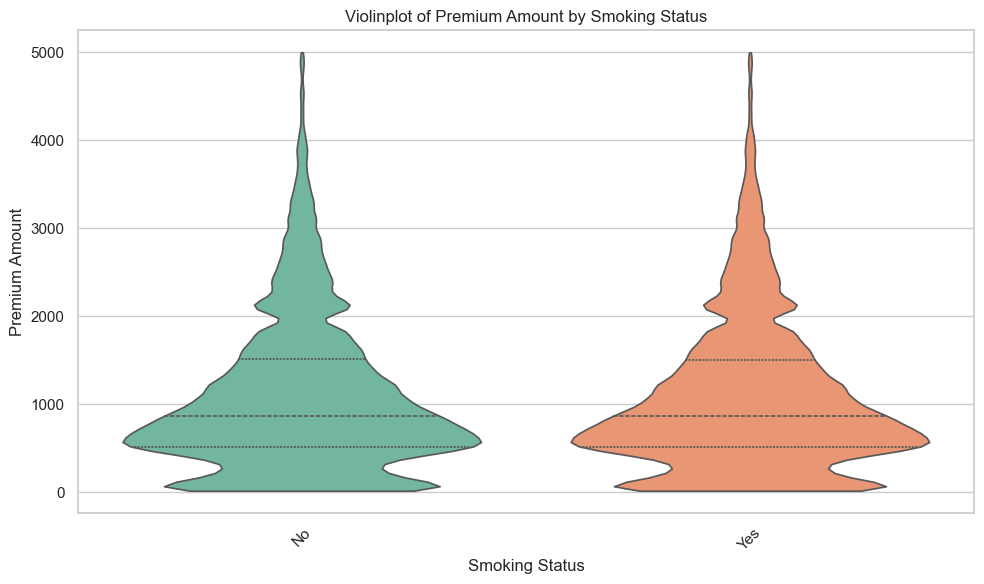

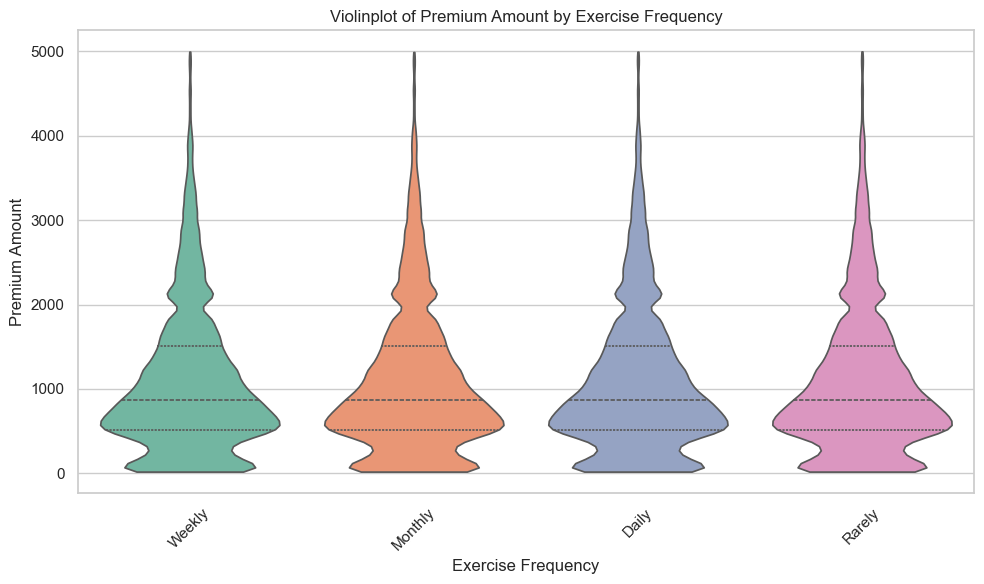

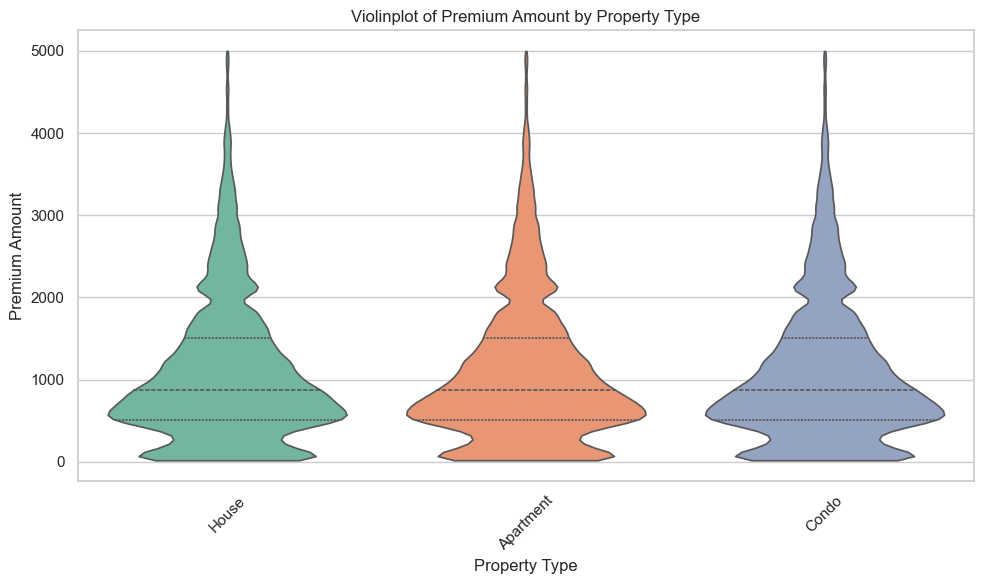

In [9]:
target_col = 'Premium Amount' 

# Correlation analysis (if we have multiple numeric features)
if len(numeric_cols) > 1:
    # Pearson and Spearman Correlation side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(24, 10))
    fig.suptitle('Correlation Matrices (Train)', fontsize=20, y=1.05)
    
    corr_pearson = train[numeric_cols].corr(method='pearson')
    sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
    axes[0].set_title('Pearson Correlations') #correlation matrix with linear dependencies
    
    corr_spearman = train[numeric_cols].corr(method='spearman')
    sns.heatmap(corr_spearman, annot=True, cmap='Purples', fmt=".2f", linewidths=.5, ax=axes[1])
    axes[1].set_title('Spearman Correlations') #correlation matrix assuming no outliners and no linear dependencies
    
    plt.tight_layout()
    plt.show()

# Analysis of relationship with target
if target_col in train.columns:
    # If target is numeric
    if train[target_col].dtype != 'O':
        # Correlation of each numeric feature with target
        if target_col in numeric_cols:
            corr_with_target = corr_pearson[target_col].drop(target_col).sort_values()
            plt.figure(figsize=(6, 8))
            corr_with_target.plot(kind='barh', color='teal')
            plt.title('Correlation with Target (Train)')
            plt.xlabel('Correlation')
            plt.ylabel('Features')
            plt.tight_layout()
            plt.show()
        
        # If we have categorical features, show a violinplot with the numeric target for each categorical feature
        if len(cat_cols) > 0:
            for cat_col in cat_cols:
                plt.figure(figsize=(10,6))
                sns.violinplot(x=cat_col, y=target_col, data=train, inner='quartile', cut=0, palette='Set2')
                #show a graph that combines density, histrgrams, box plots
                #verify not to have outliers
                #central line - median value(thick one)
                #box - the range of 50% near the median
                plt.title(f'Violinplot of {target_col} by {cat_col}')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

Now we want to see the numbers

In [10]:
for cat_col in cat_cols:
    print(f"Summary statistics for target grouped by {cat_col}:")
    print(train.groupby(cat_col)[target_col].describe())
    print("\n" + "="*50 + "\n")

Summary statistics for target grouped by Gender:
           count         mean         std   min    25%    50%     75%     max
Gender                                                                       
Female  597429.0  1102.404974  864.781318  20.0  514.0  872.0  1507.0  4997.0
Male    602571.0  1102.683476  865.215184  20.0  514.0  872.0  1512.0  4999.0


Summary statistics for target grouped by Marital Status:
                   count         mean         std   min    25%    50%     75%  \
Marital Status                                                                  
Divorced        391764.0  1100.625116  865.531261  20.0  513.0  870.0  1507.0   
Married         394316.0  1099.844389  862.923644  20.0  514.0  870.0  1506.0   
Single          395391.0  1101.735535  864.291472  20.0  514.0  872.0  1505.0   

                   max  
Marital Status          
Divorced        4997.0  
Married         4996.0  
Single          4999.0  


Summary statistics for target grouped by Educat

Check if train and test sets are drawn from similar distributions

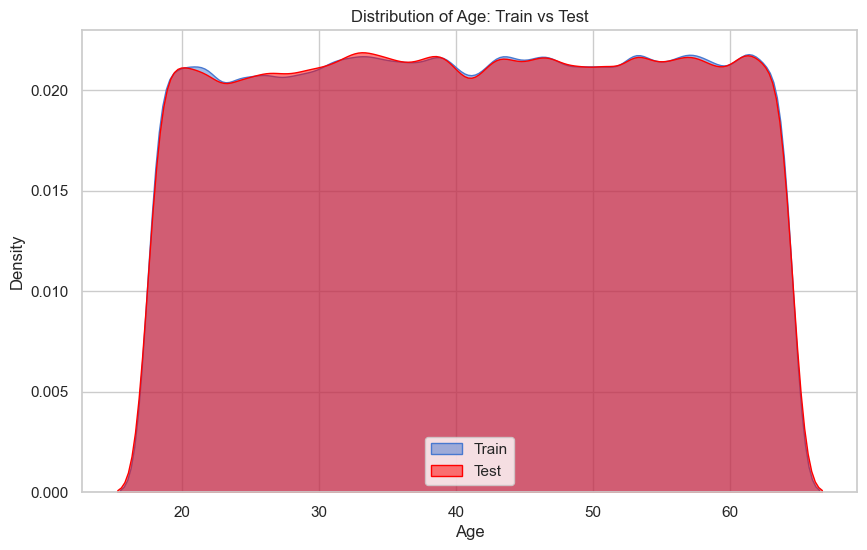

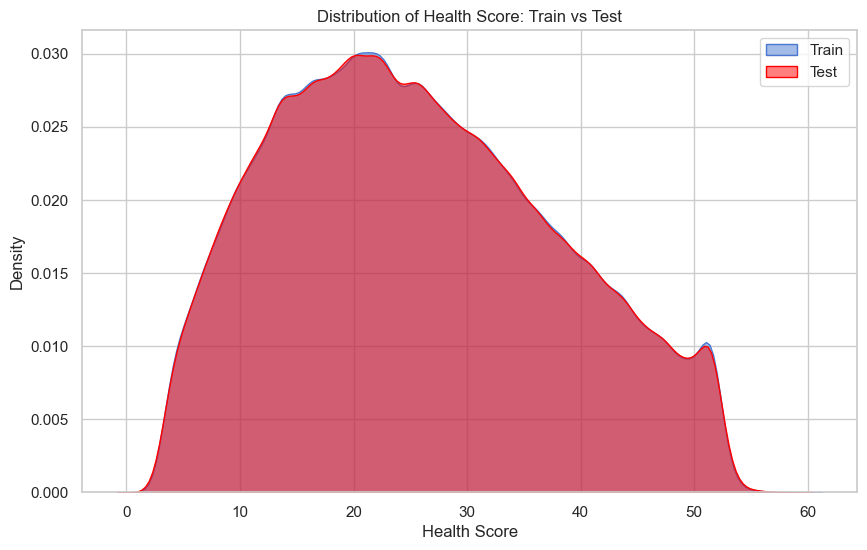

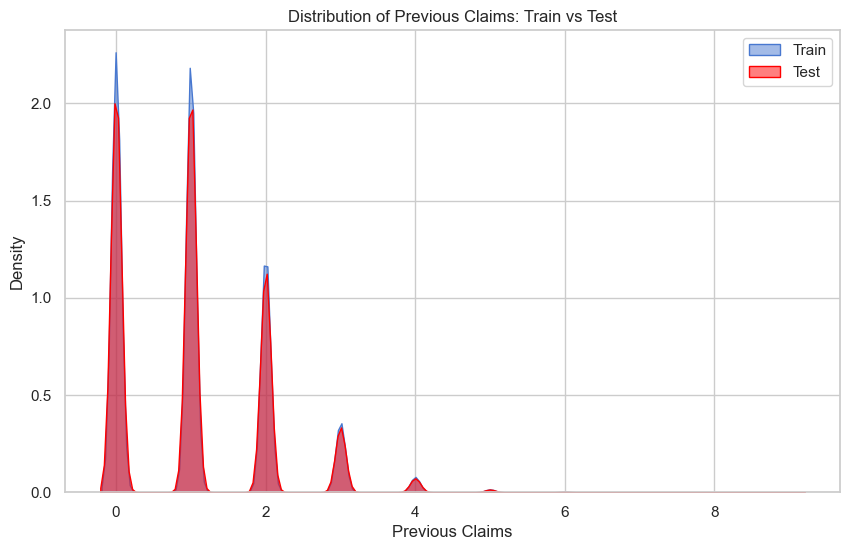

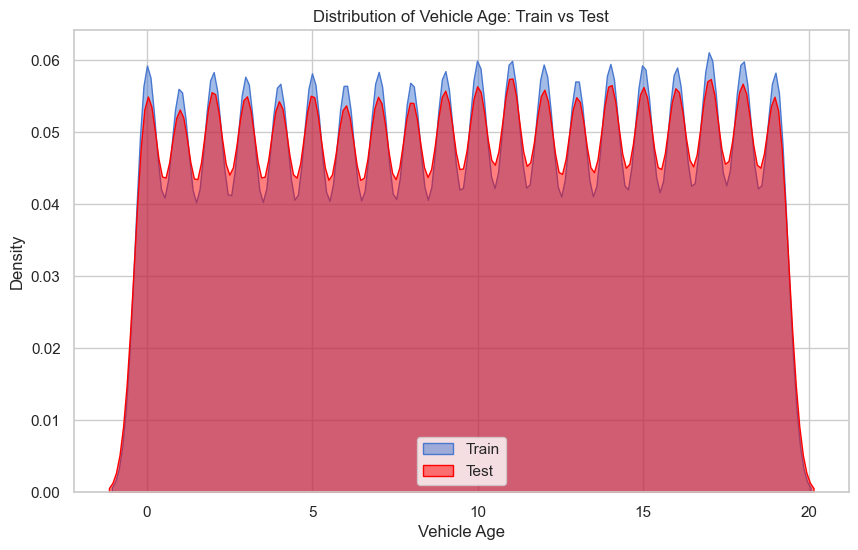

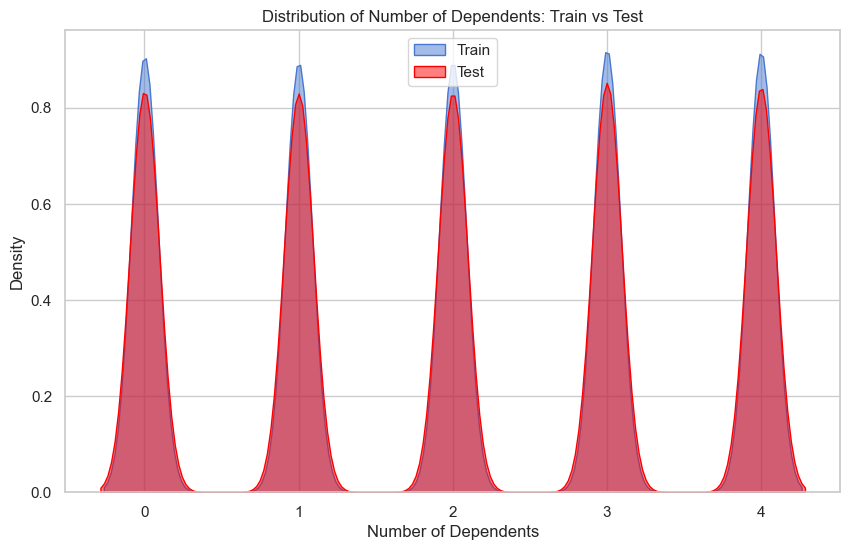

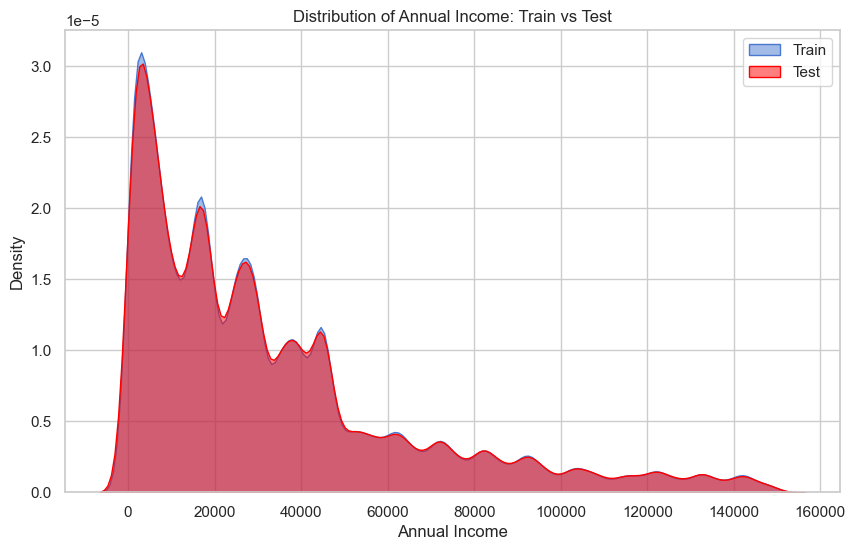

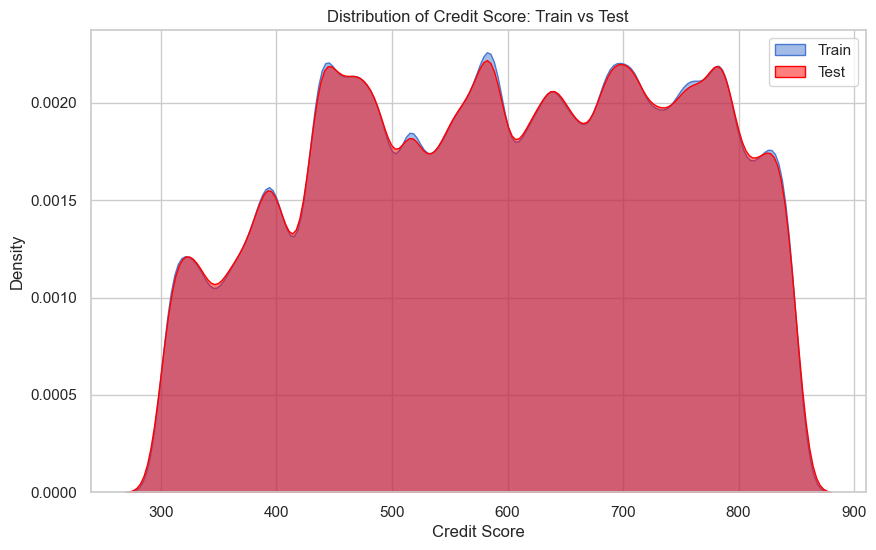

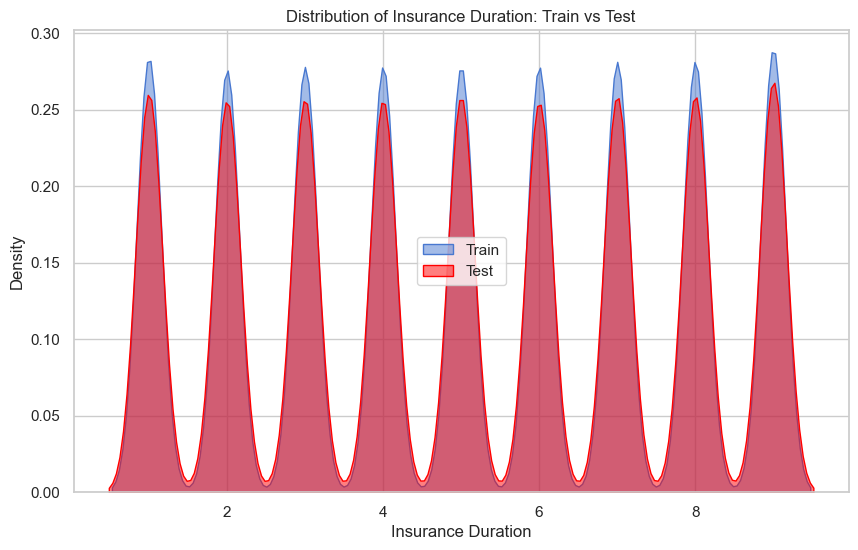

In [11]:
common_cols = list(set(train.columns).intersection(set(test.columns)))

for col in common_cols:
    if col in numeric_cols:
        plt.figure()
        sns.kdeplot(data=train, x=col, fill=True, alpha=0.5, label='Train')
        sns.kdeplot(data=test, x=col, fill=True, alpha=0.5, label='Test', color='red')
        plt.title(f'Distribution of {col}: Train vs Test')
        plt.legend()
        plt.show()

- we can observe that train and test data look the same, so we can train a model to predict the final result

**Detecting outliers**

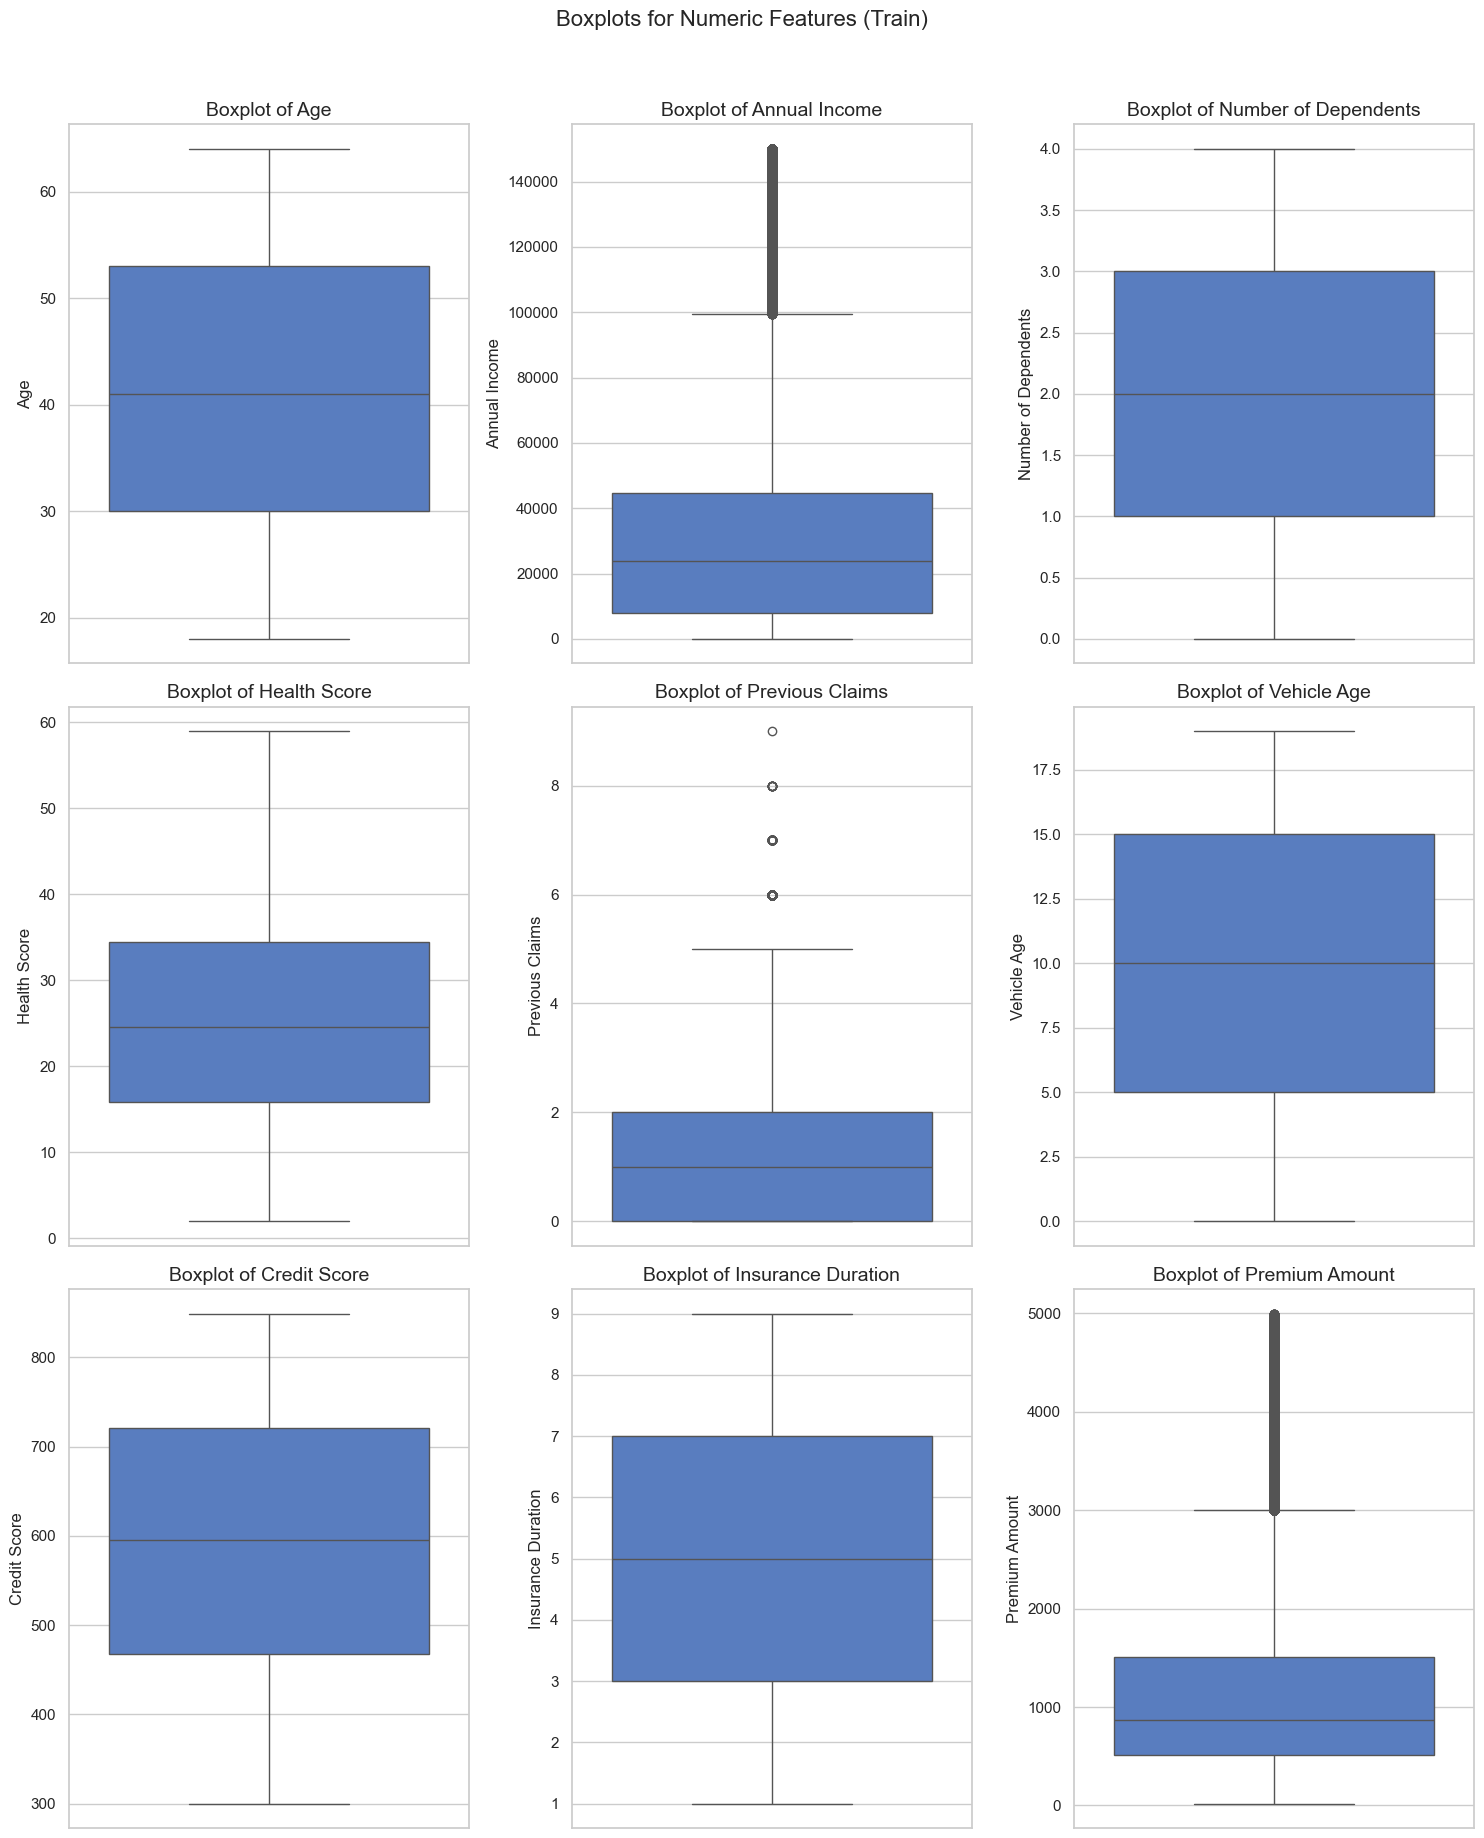

In [12]:
import math

# Determine a reasonable grid layout for all numeric columns
num_features = len(numeric_cols)
cols_per_row = 3
num_rows = math.ceil(num_features / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 6*num_rows))
axes = axes.flatten()  # Flatten to easily iterate over axes

fig.suptitle('Boxplots for Numeric Features (Train)', fontsize=16, y=1.02)

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=train[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove any unused subplots if numeric_cols doesn't fill the grid
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- we observe that there are numerous outliers in the Boxplot of Annual Income and Premium Amount, and some in the Boxplot of Previous Claims.
- because a scatter plot is difficult to interpret we make a hexbin plot. darker color less density. We can also identify trends.

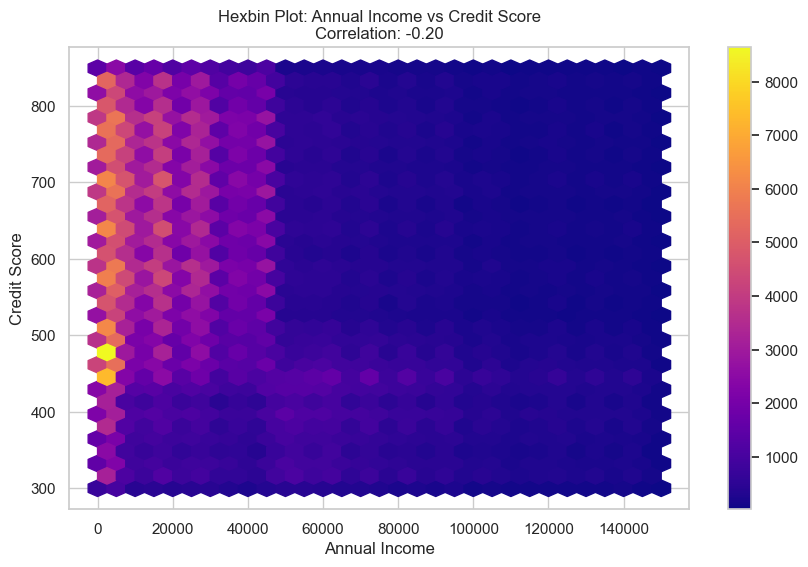

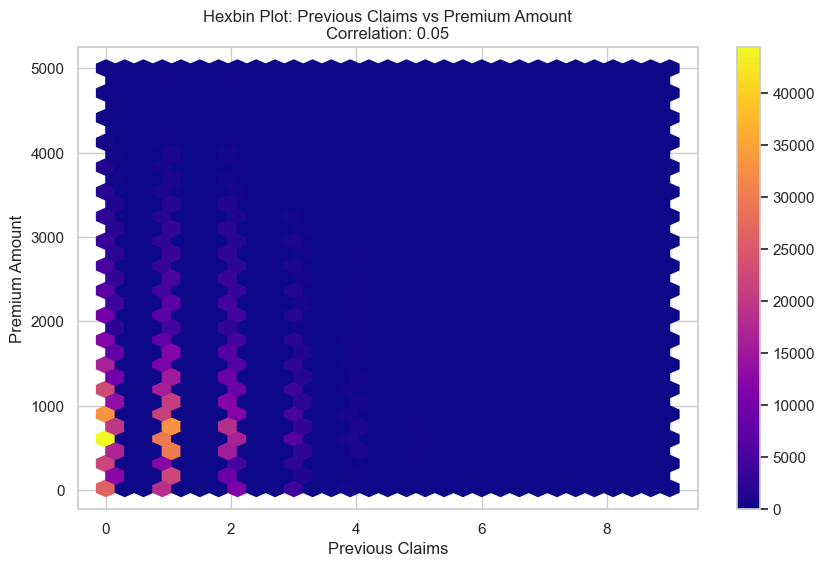

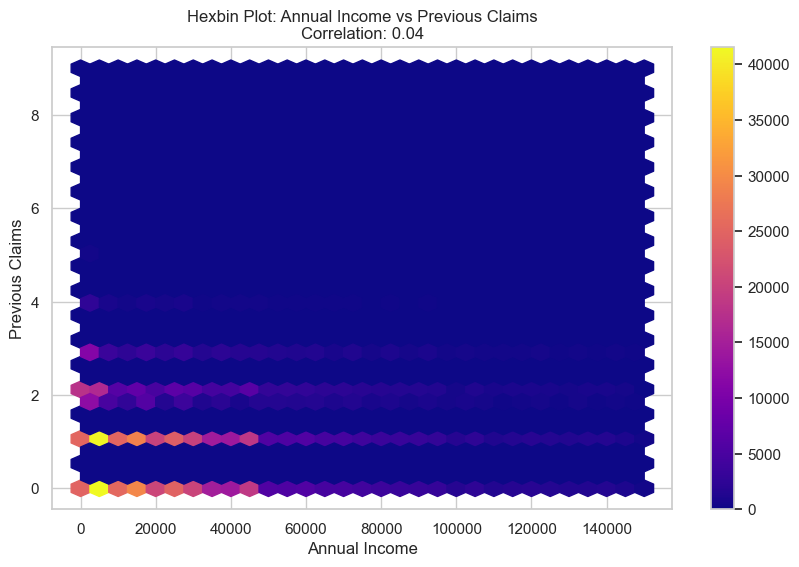

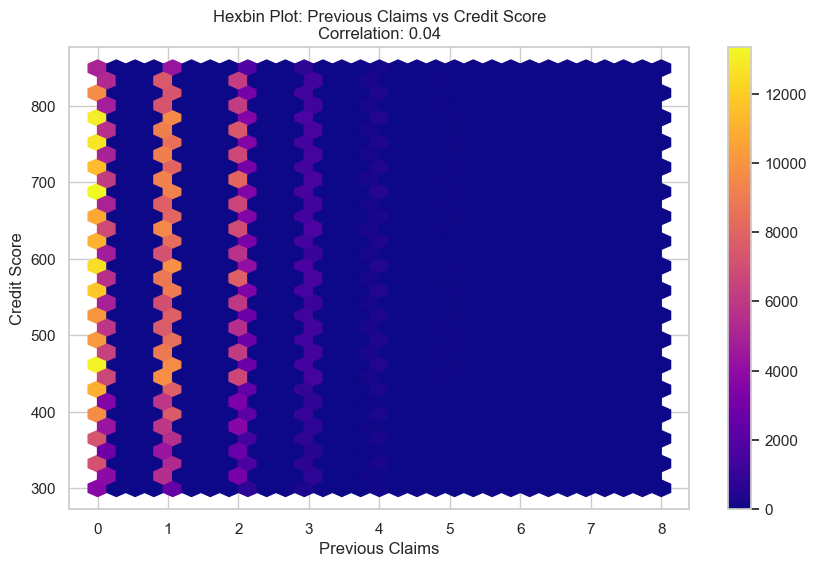

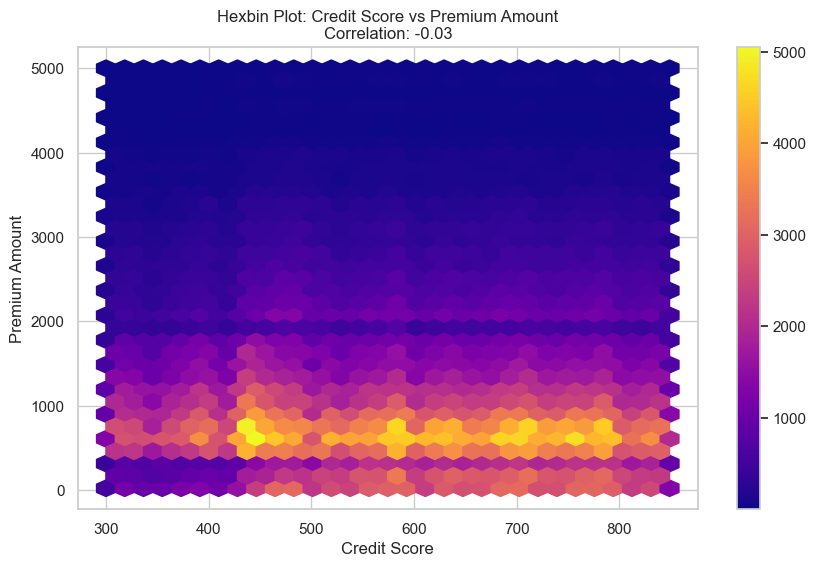

,mean,median,count,std,min,max
,Premium Amount,Premium Amount,Premium Amount,Premium Amount,Premium Amount,Premium Amount
Gender,,,,,,
Female,1102.404974,872.0,597429,864.781318,20.0,4997.0
Male,1102.683476,872.0,602571,865.215184,20.0,4999.0


In [13]:
if len(numeric_cols) > 1:
    # Compute correlation
    corr_matrix = train[numeric_cols].corr()
    
    # Extract upper triangle of correlation matrix without the diagonal
    pairs = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            pairs.append((numeric_cols[i], numeric_cols[j], corr_matrix.iloc[i, j]))
    
    # Sort pairs by absolute correlation
    pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Take top 5 pairs (or fewer if not enough pairs)
    top_pairs = pairs[:5]

    for (col1, col2, val) in top_pairs:
        plt.figure()
        # Create a hexbin plot for the data points
        # Not specifying colors or colormaps, just using defaults
        plt.hexbin(train[col1], train[col2], gridsize=30, cmap ='plasma')
        plt.title(f'Hexbin Plot: {col1} vs {col2}\nCorrelation: {val:.2f}')
        plt.colorbar()
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()

# -----------------------------
# Pivot table with more statistics for a categorical column vs numeric target
if len(cat_cols) > 0:
    cat_for_pivot = cat_cols[0]
    if target_col in train.columns and train[target_col].dtype != 'O':
        agg_funcs = ['mean', 'median', 'count', 'std', 'min', 'max']
        pivot_table = train.pivot_table(values=target_col, 
                                        index=cat_for_pivot, 
                                        aggfunc=agg_funcs)
        display(pivot_table)

## From now on we focus on building and train the model